In [2]:
'''

Use the Dry Bean Dataset.xlsx available on the github page of the labs.
•Divide your dataset into a train and a test set.
•Preprocess the data by centering the variables and dividing them by their
standard deviation.
•Write your own algorithm to perform PCA on the variables.
•Using the training set, obtain and plot the eigenvalue spectrum using the
log-scale for the y-axis. What number of principal components would you
select?
•Project the data (training set) in the first two principal components and
color by class. Do it also for three principal components.
•For an increasing number of principal components (1 to 16):
–Apply a multinomial logistic regression to learn a model on the train-
ing set (use sklearn.linar model.LogisticRegression).
–Transform the test set with the matrix learned from the training set.
Make a prediction with the logistic model learned.
–Assess the quality of the predictions and comment on the results

'''

'\n\nUse the Dry Bean Dataset.xlsx available on the github page of the labs.\n•Divide your dataset into a train and a test set.\n•Preprocess the data by centering the variables and dividing them by their\nstandard deviation.\n•Write your own algorithm to perform PCA on the variables.\n•Using the training set, obtain and plot the eigenvalue spectrum using the\nlog-scale for the y-axis. What number of principal components would you\nselect?\n•Project the data (training set) in the first two principal components and\ncolor by class. Do it also for three principal components.\n•For an increasing number of principal components (1 to 16):\n–Apply a multinomial logistic regression to learn a model on the train-\ning set (use sklearn.linar model.LogisticRegression).\n–Transform the test set with the matrix learned from the training set.\nMake a prediction with the logistic model learned.\n–Assess the quality of the predictions and comment on the results\n\n'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from numpy.linalg import eig 
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings

In [4]:
warnings.filterwarnings("ignore", category=FutureWarning, module='sklearn')


In [5]:
df = pd.read_excel("../Datasets/Dry_Bean_Dataset.xlsx")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [6]:
X= df.drop('Class', axis=1)
y= df['Class']

In [7]:
encoder= OrdinalEncoder()
y = np.array(y)
encoder.fit(y.reshape(-1,1))

y= encoder.transform(y.reshape(-1,1))
print(y)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


[[5.]
 [5.]
 [5.]
 ...
 [3.]
 [3.]
 [3.]]


In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
#Centratura dati

Xmean= Xtrain.mean()
Xstd= Xtrain.std()

Xtrain= (Xtrain-Xmean)/Xstd

In [10]:
#Matrice di varianze-covarianze

cov= np.cov(Xtrain, rowvar=False)
print(cov.shape)

(16, 16)


In [11]:
#Diagonalizzazione

#Trovare gli autovalori
autovalori, autovettori = eig(cov)

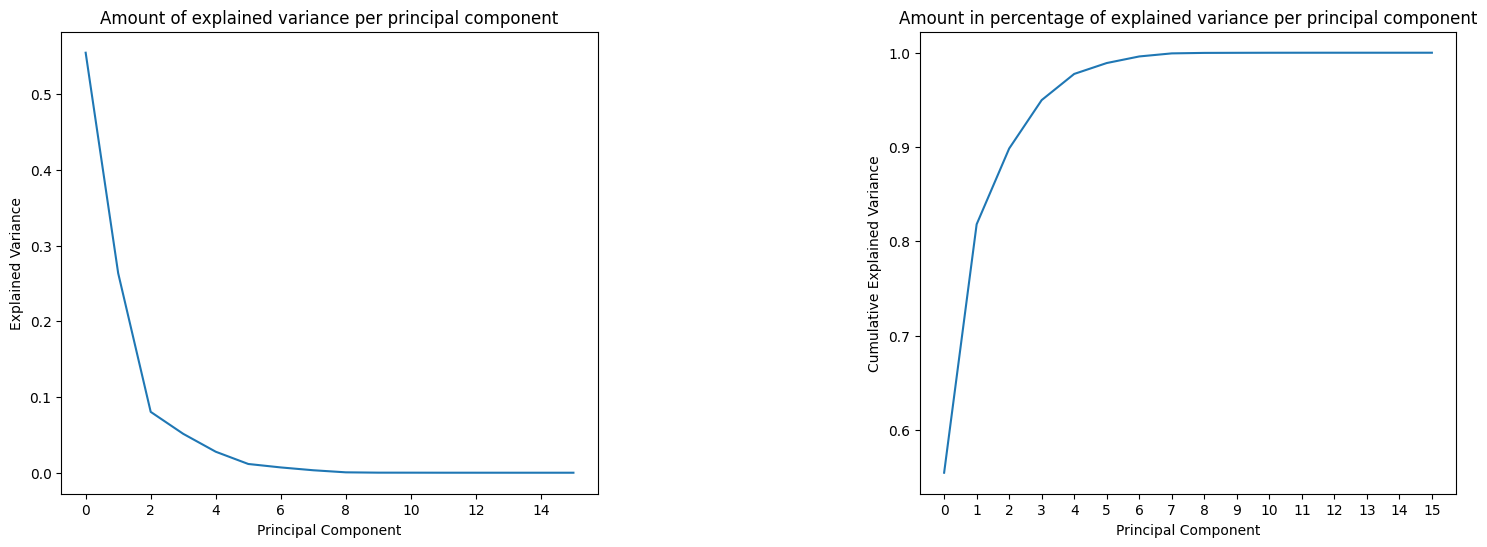

In [12]:
#Elbow plot

fig, axs = plt.subplots(1, 2, figsize=(18,6))
fig.subplots_adjust(wspace=0.6, hspace=0.4)



axs[0].set_title("Amount of explained variance per principal component")
#axs[0].plot((autovalori))
axs[0].plot(autovalori/np.sum(autovalori))
#axs[0].bar(range(1, len(autovalori)+1), autovalori, alpha=0.5)
axs[0].set_xlabel("Principal Component")
axs[0].set_ylabel("Explained Variance")
#axs[0].set_xticks(np.arange(len(autovalori))) 



axs[1].set_title("Amount in percentage of explained variance per principal component")
axs[1].plot(np.cumsum(autovalori)/np.sum(autovalori))
axs[1].set_xlabel("Principal Component")
axs[1].set_ylabel("Cumulative Explained Variance")
axs[1].set_xticks(np.arange(len(autovalori)))  # Imposta le posizioni dei tick



#plt.show()

Text(0, 0.5, 'Cumulative Explained Variance')

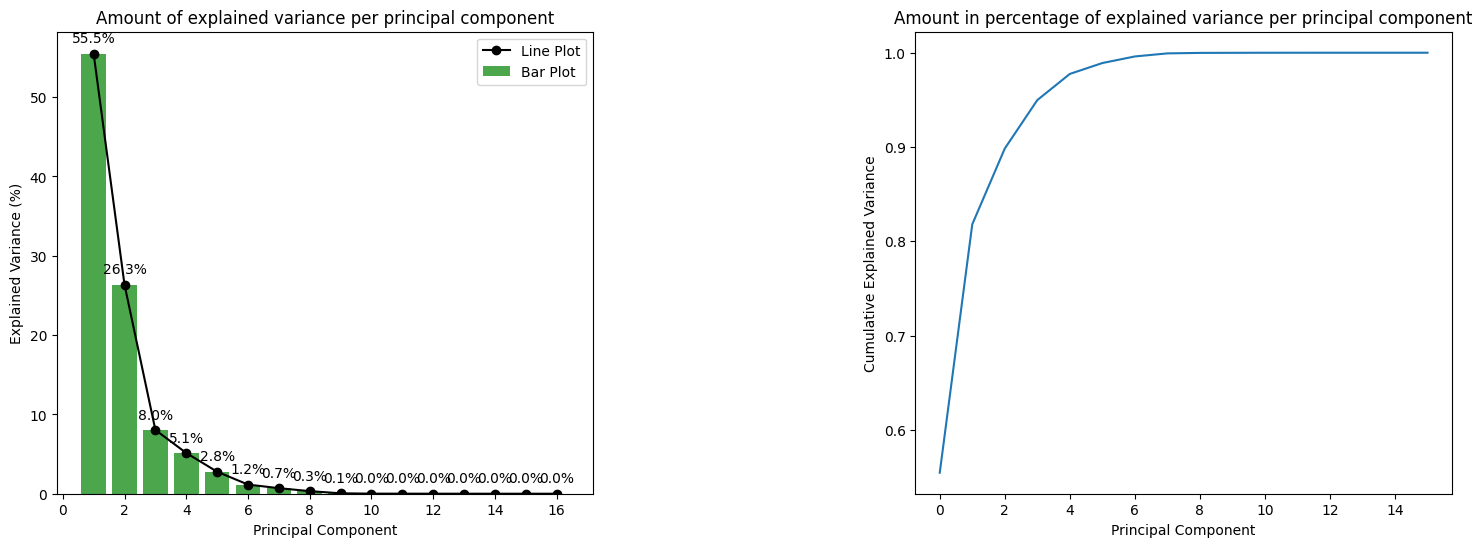

In [13]:
percentuali = (autovalori / np.sum(autovalori)) * 100

# Creazione della griglia di subplot (1 riga, 2 colonne)
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
fig.subplots_adjust(wspace=0.6, hspace=0.4)  # Regola lo spazio tra i subplot

# Grafico 1: Amount of explained variance per principal component con linea e bar plot
axs[0].set_title("Amount of explained variance per principal component")
axs[0].bar(range(1, len(autovalori) + 1), percentuali, alpha=0.7, label='Bar Plot', color='green')
axs[0].plot(range(1, len(autovalori) + 1), percentuali, marker='o', color='black', label='Line Plot')
axs[0].set_ylabel("Explained Variance (%)")
axs[0].set_xlabel("Principal Component")

# Aggiunta delle etichette percentuali sulle barre
for i, val in enumerate(percentuali):
    axs[0].text(i + 1, val + 1, f'{val:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

axs[0].legend()

# Grafico 2: Amount in percentage of explained variance per principal component
axs[1].set_title("Amount in percentage of explained variance per principal component")
axs[1].plot(np.cumsum(autovalori) / np.sum(autovalori))
axs[1].set_xlabel("Principal Component")
axs[1].set_ylabel("Cumulative Explained Variance")


#plt.show()

Text(0.5, 1.0, 'Eigenvalue spectrum using log-scale for the y-axis')

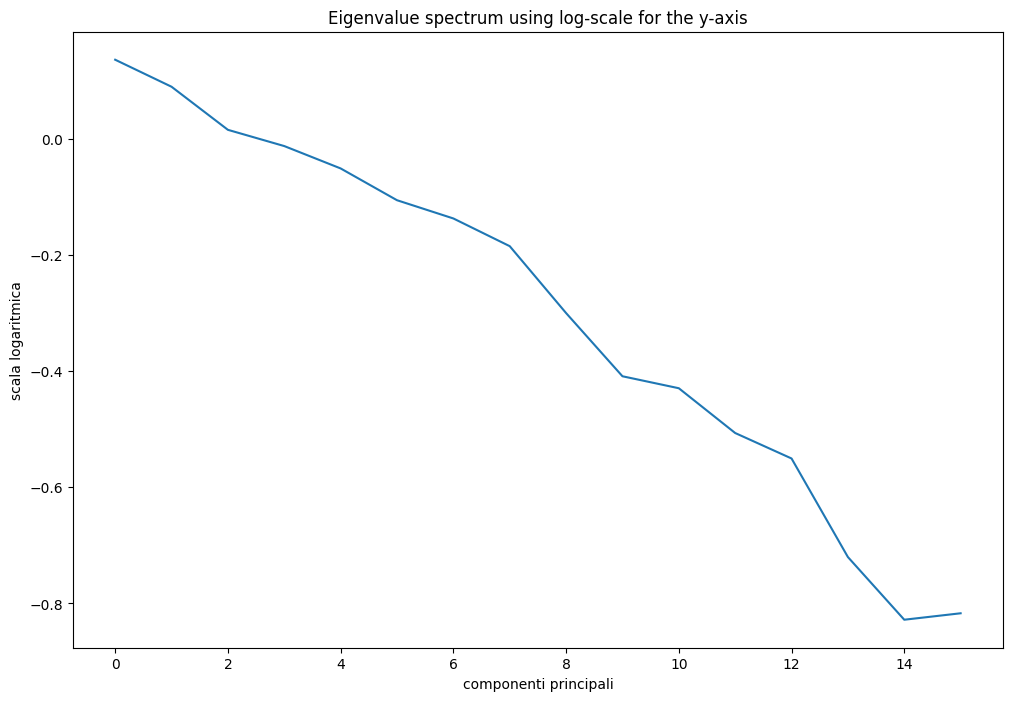

In [14]:
#Eigenvalue spectrum using log-scale for the y-axis

fig= plt.figure(figsize=(12, 8))
plt.plot(np.log(autovalori)/np.sum(autovalori))
plt.xlabel('componenti principali') 
plt.ylabel('scala logaritmica')
plt.title('Eigenvalue spectrum using log-scale for the y-axis')
#plt.show()

Text(0.5, 1.0, "Spettro degli Autovalori con Scala Logaritmica sull'Asse Y")

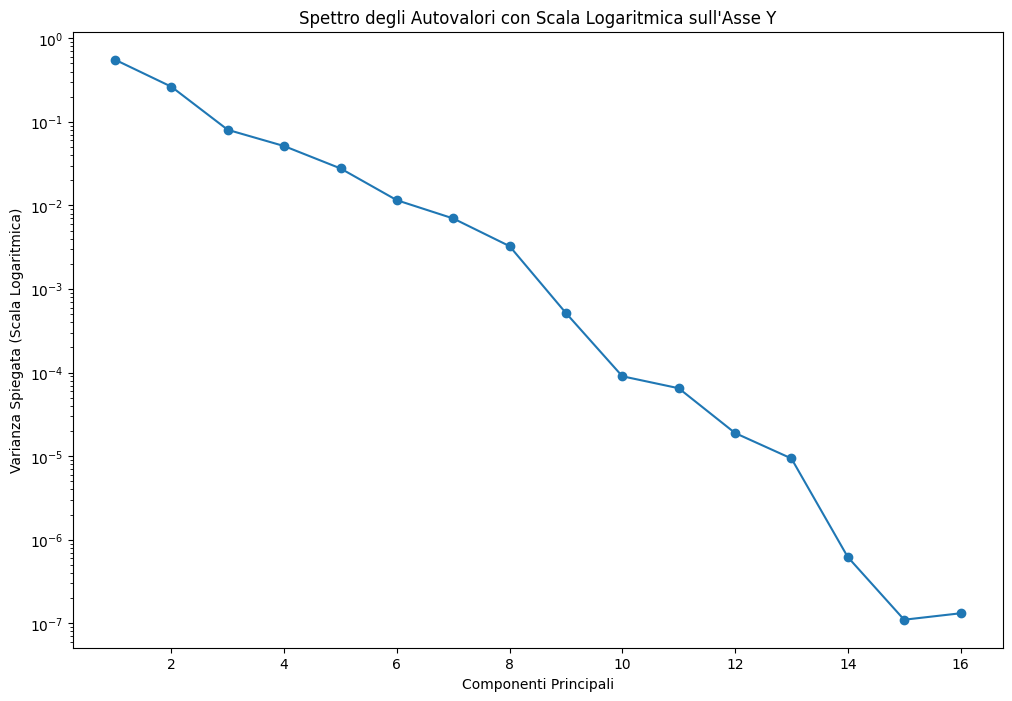

In [15]:
fig = plt.figure(figsize=(12, 8))
axs = fig.add_subplot(111)  # Aggiungi un subplot alla figura

# Usa direttamente gli autovalori normalizzati
axs.plot(np.arange(1, len(autovalori) + 1), autovalori / np.sum(autovalori), marker='o')
axs.set_yscale('log')  # Imposta la scala logaritmica per l'asse y

axs.set_xlabel('Componenti Principali')
axs.set_ylabel('Varianza Spiegata (Scala Logaritmica)')
axs.set_title('Spettro degli Autovalori con Scala Logaritmica sull\'Asse Y')

#plt.show()

In [16]:
#Proiezione dei dati

componenti_2 = autovettori[:, :2] #per come eig calcola gli autovettori, ogni autovettore è una colonna, dunque prendiamo le prime due perché vogliamo le prime due componenti
componenti_3 = autovettori[:, :3]

projection_pc2= np.dot(Xtrain, componenti_2)
projection_pc3= np.dot(Xtrain, componenti_3)

ytrain = np.array(ytrain).reshape(-1, 1)

data_pc2=np.column_stack((projection_pc2, ytrain))
data_pc3=np.column_stack((projection_pc3, ytrain))



In [17]:
def plot2d(data, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.scatter(data[:,0], data[:,1], c=ytrain)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    plt.title(title)
    plt.show()

def plot3d(data, title):
    fig=plt.figure(figsize=(10, 8))
    axes = fig.add_subplot(111)
    axes = plt.axes(projection='3d')
    axes.view_init(30, 15)
    axes.scatter(data[:,0], data[:,1], c=ytrain)
    axes.set_xlabel('1st component')
    axes.set_ylabel('2nd component')
    axes.set_zlabel('3rd component')
    plt.title(title)
    #plt.show()

In [18]:
#plot2d(data_pc2, "Projected data in the intrinsic dimension for 2 components")
#plot3d(data_pc3, "Projected data in the intrinsic dimension for 3 components")



•For an increasing number of principal components (1 to 16):
–Apply a multinomial logistic regression to learn a model on the train-
ing set (use sklearn.linar model.LogisticRegression).
–Transform the test set with the matrix learned from the training set.
Make a prediction with the logistic model learned.
–Assess the quality of the predictions and comment on the results

In [19]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Lista per salvare le accuratezze
accuracies = []

# Addestramento e valutazione del modello per un numero crescente di componenti principali
for n_components in range(1, 17):
    # Applicazione di PCA
    pca = PCA(n_components= n_components)
    X_train_pca = pca.fit_transform(Xtrain)
    X_test_pca = pca.transform(Xtest)

 # Addestramento del modello di regressione logistica
    lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
    lr.fit(X_train_pca, ytrain.ravel())

    # Predizioni e valutazione del modello
    y_pred = lr.predict(X_test_pca)
    accuracy = accuracy_score(ytest.ravel(), y_pred)
    
    # Salva l'accuratezza per il numero corrente di componenti principali
    accuracies.append((n_components, accuracy))
    print(f'n_components={n_components}, accuracy={accuracy:.2f}')

n_components=1, accuracy=0.62
n_components=2, accuracy=0.87
n_components=3, accuracy=0.87
n_components=4, accuracy=0.89
n_components=5, accuracy=0.92
n_components=6, accuracy=0.93
n_components=7, accuracy=0.93
n_components=8, accuracy=0.93
n_components=9, accuracy=0.93
n_components=10, accuracy=0.93
n_components=11, accuracy=0.93
n_components=12, accuracy=0.93
n_components=13, accuracy=0.93
n_components=14, accuracy=0.93
n_components=15, accuracy=0.93
n_components=16, accuracy=0.93


In [21]:
accuracies

[(1, 0.6188027910392949),
 (2, 0.8677928755049578),
 (3, 0.8710980536173338),
 (4, 0.8912963643040764),
 (5, 0.9236136614028645),
 (6, 0.9258171134777818),
 (7, 0.9261843554902681),
 (8, 0.9261843554902681),
 (9, 0.9261843554902681),
 (10, 0.9254498714652957),
 (11, 0.9261843554902681),
 (12, 0.9254498714652957),
 (13, 0.9261843554902681),
 (14, 0.9265515975027543),
 (15, 0.9254498714652957),
 (16, 0.9258171134777818)]

True

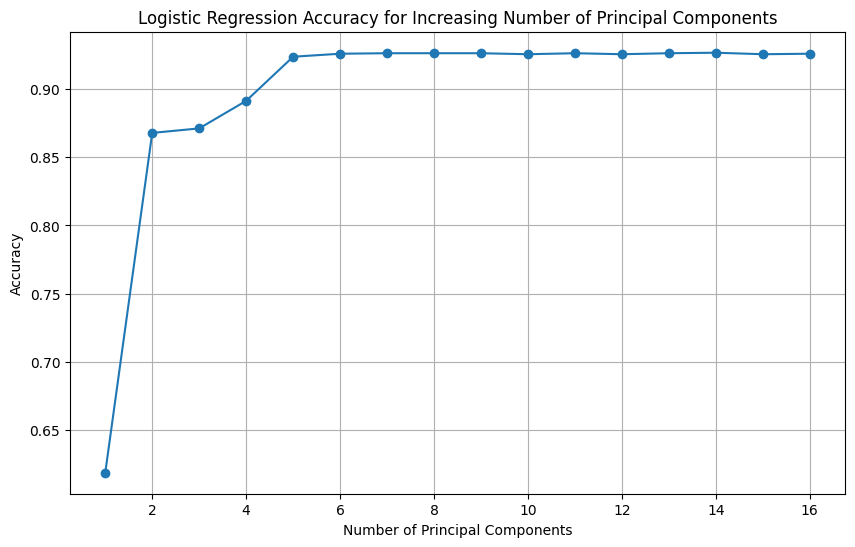

In [22]:
# Separare i dati per la visualizzazione
n_components, accuracy_values = zip(*accuracies)

plt.figure(figsize=(10, 6))
plt.plot(n_components, accuracy_values, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy for Increasing Number of Principal Components')
plt.grid(True)
plt.show()

In [48]:
accuracies_array= np.array(accuracies)
max_index = np.argmax(accuracies_array[:,1])
max_value = accuracies_array[max_index, 1]


print(f"The maximum value of the accuracy score is reached with {int(accuracies_array[max_index, 0])} components and it's equal to {max_value:.2f}")


The maximum value of the accuracy score is reached with 14 components and it's equal to 0.93


Try to apply PCA to the Swiss Roll dataset (n= 1000) from Lab 1 and plot the
projection on the first two principal components. Choose an appropriate color
scheme for visualization and comment on your results.


In [74]:
def swiss_roll(n):
    data = np.zeros((n, 3))
    phi = np.random.uniform(1.5*np.pi, 4.5*np.pi, n)
    psi = np.random.uniform(0, 10, n)
    data[:,0]= phi * np.cos(phi) #coordinata x
    data[:,1] = phi * np.sin(phi) #coordinata y
    data[:,2] = psi #coordinata z
    return data


def plot_swiss_roll2d(data, title):
    fig=plt.figure(figsize=(10, 8))
    plt.scatter(data[:,0], data[:,1]) #c=data[:,0])
    plt.title(title)
    plt.show()


# Creazione della griglia di subplot (1 riga, 2 colonne)

def comparison_plot(data1, data2, title1, title2):
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    fig.subplots_adjust(wspace=0.6, hspace=0.4)
    axs[0].scatter(data1[:,0], data1[:,1])
    axs[1].scatter(data2[:,0], data2[:,1])
    axs[0].set_title(title1)
    axs[1].set_title(title2)
    plt.show()

In [68]:
X = swiss_roll(1000)

X = (X-np.mean(X))/np.std(X)

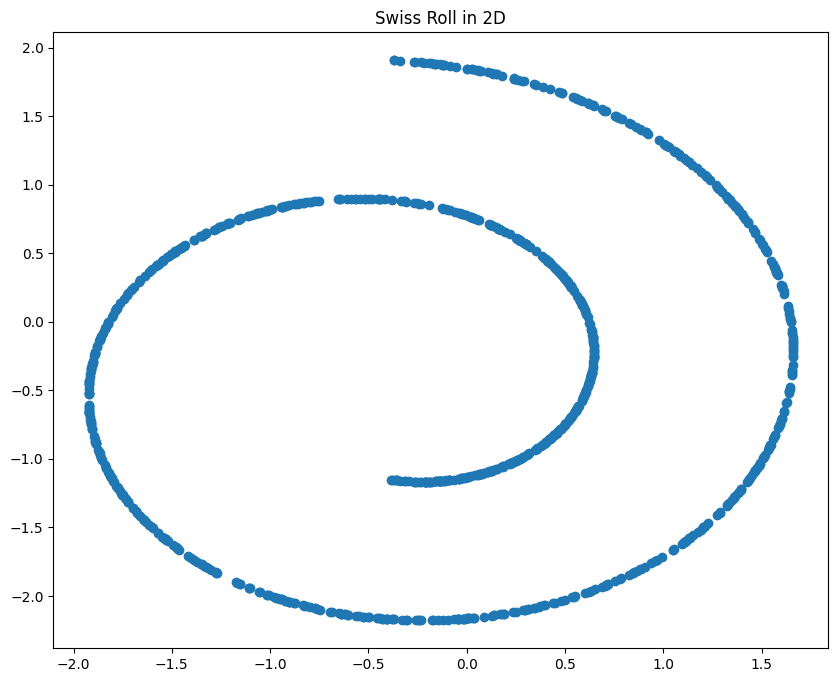

In [73]:
plot_swiss_roll2d(X, "Swiss Roll in 2D")

In [70]:
pca_swiss = PCA(n_components=2)
X_pca = pca_swiss.fit_transform(X)

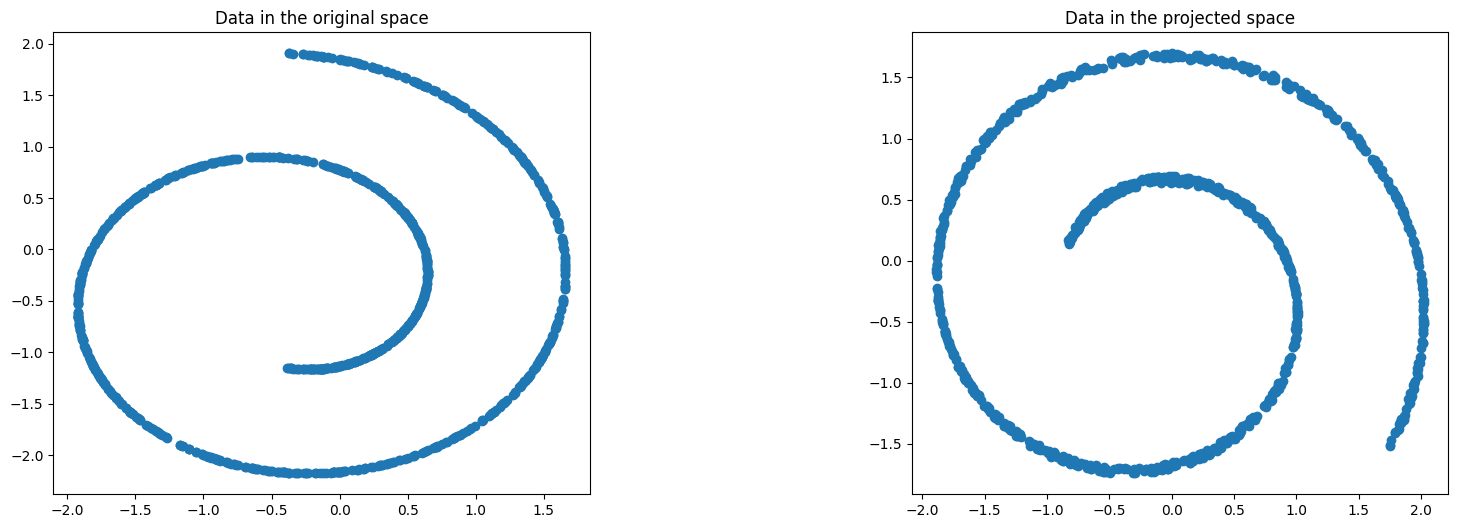

In [75]:
comparison_plot(X, X_pca, "Data in the original space", "Data in the projected space" )